C:\Users\easyt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.8777 - loss: 0.4140 - val_accuracy: 0.9783 - val_loss: 0.0715
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9824 - loss: 0.0571 - val_accuracy: 0.9870 - val_loss: 0.0463
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9887 - loss: 0.0355 - val_accuracy: 0.9868 - val_loss: 0.0467
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9922 - loss: 0.0260 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9875 - val_loss: 0.0438
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9854 - loss: 0.0468
Test Accuracy: 98.82%


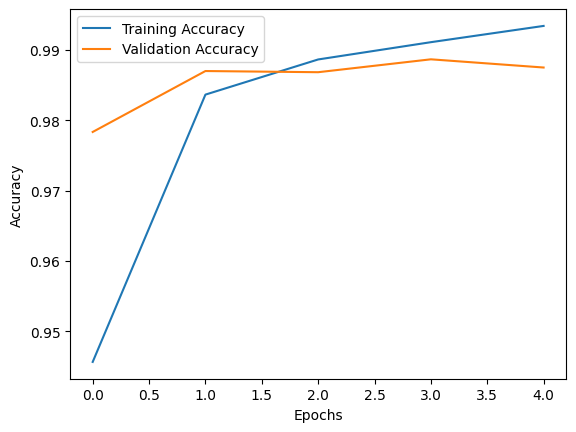

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to include a channel dimension (needed for CNNs)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential()

# 1. Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# 2. Pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# 3. Add another convolutional and pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 4. Flatten the output for the fully connected layers
model.add(layers.Flatten())

# 5. Fully connected (Dense) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for MNIST

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model (optional)
model.save("cnn_model.h5")
